# 15.1. Correlation

*linear association*: a measure of how tightly clustered a scatter diagram is about a straight line. 

In [11]:
##### Q1. headers; Note: all imports should include conventional aliases where apply
##### import numpy
import numpy as np
##### import matplotlib
import matplotlib.pyplot as plt
import matplotlib.pyplot as plots
##### use the magic function matplotlib in IPython to enable inline rendering
%matplotlib inline
plots.style.use('fivethirtyeight')
##### import datascience
from datascience import *
##### set up the path_data variable 
path_data = '../../data/'

plt.style.use('fivethirtyeight')

The table `hybrid` contains data on hybrid passenger cars sold in the United States from 1997 to 2013. The data were adapted from the online data archive of [Prof. Larry Winner](http://www.stat.ufl.edu/%7Ewinner/) of the University of Florida. The columns:

- `vehicle`: model of the car
- `year`: year of manufacture
- `msrp`: manufacturer's suggested retail price in 2013 dollars
- `acceleration`: acceleration rate in km per hour per second
- `mpg`: fuel econonmy in miles per gallon
- `class`: the model's class.

In [12]:
##### import data hybrid.csv as table and name it hybrid
hybrid = Table.read_table(path_data + 'hybrid.csv')
hybrid.show(5)

vehicle,year,msrp,acceleration,mpg,class
Prius (1st Gen),1997,24509.7,7.46,41.26,Compact
Tino,2000,35355,8.2,54.1,Compact
Prius (2nd Gen),2000,26832.2,7.97,45.23,Compact
Insight,2000,18936.4,9.52,53,Two Seater
Civic (1st Gen),2001,25833.4,7.04,47.04,Compact


<Figure size 200x200 with 0 Axes>

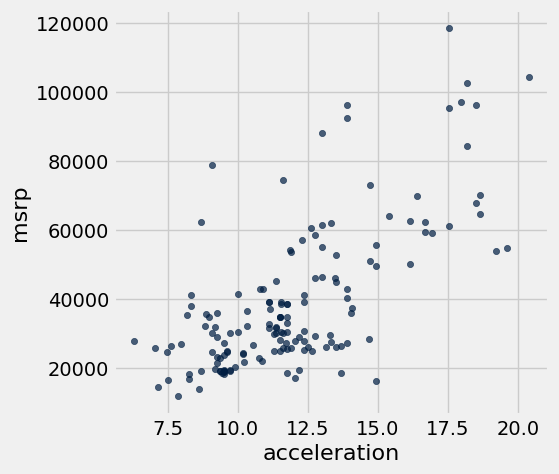

In [19]:
##### positive association
##### show a scatter plot of msrp (y-axis) and acceleration (x-axis)
plots.figure(figsize=(2,2))
hybrid.scatter('acceleration', 'msrp' )

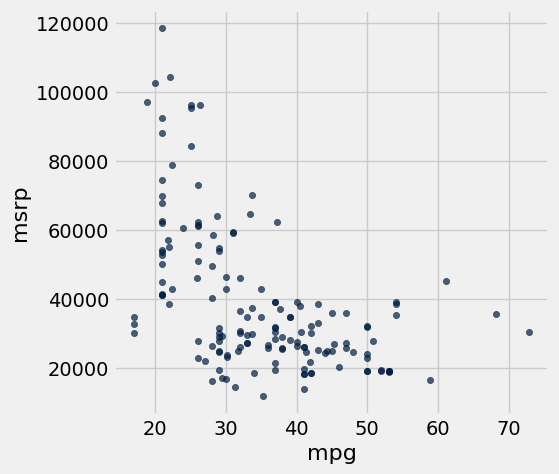

In [14]:
##### negative association
##### show the scatter plot of mpg and msrp (y-axis)
hybrid.scatter('mpg', 'msrp')

In [27]:
##### create a new table, call it suv, that include only the class SUV 
##### but not other cars such as Compact or Two Seater
suv = hybrid.where('class', are.equal_to('SUV'))
suv.show(3)
print(f"Total number of SUVs: {suv.num_rows}")

vehicle,year,msrp,acceleration,mpg,class
Escape,2004,36676.1,10.32,31.99,SUV
Lexus RX400h,2005,58521.1,12.76,28.23,SUV
Highlander,2005,29186.2,12.76,29.4,SUV


Total number of SUVs: 39


In [28]:
##### how many SUV's are in this new suv dataset?
suv.num_rows

39

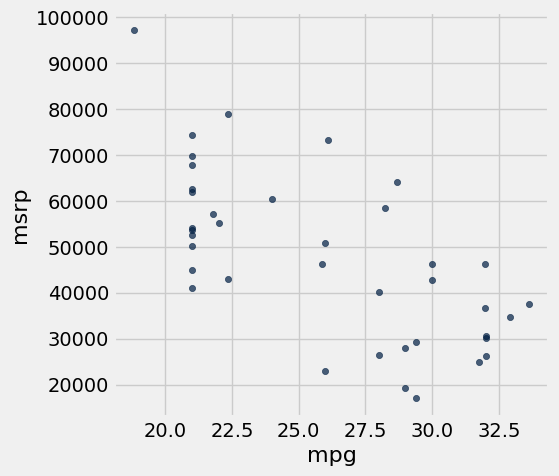

In [29]:
##### clear negative association
##### show scatter plot of mpg vs msrp for suv
suv.scatter('mpg', 'msrp')

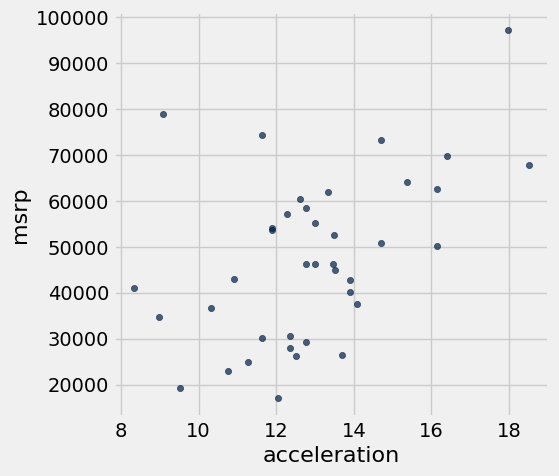

In [37]:
##### assumption: pay more for greater acceleration
##### now show the scatter plot of acceleration vs msrp (y-axis) for suv
### this gives us the SUV acceleration vs msrp
# plt.figure(figsize=(2,2), dpi=100)
suv.scatter('acceleration', 'msrp' )

In [41]:
# we would like to use standard units
#### make sure you know how to do this. 

def standard_units(any_numbers):
    "Convert any array of numbers to standard units."
    return (any_numbers - np.mean(any_numbers))/np.std(any_numbers)  ### ( raw score - mean ) / std

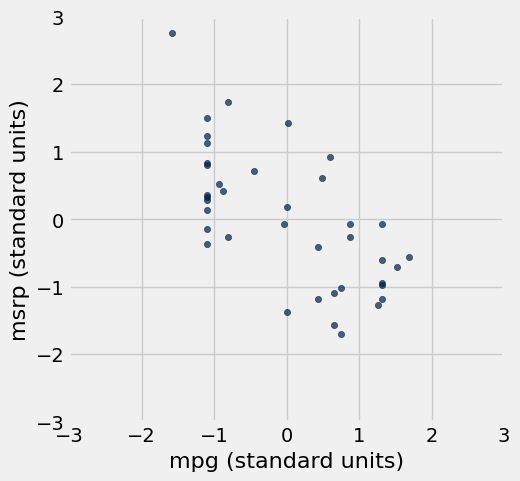

In [44]:
### use the function to redraw the two scatter diagrams for SUVs 
### with vairables measured in standard units

Table().with_columns(
    'mpg (standard units)',  standard_units(suv.column('mpg')), 
    'msrp (standard units)', standard_units(suv.column('msrp'))
).scatter(0, 1)           ### note the syntax of .scatter
plots.xlim(-3, 3)
plots.ylim(-3, 3);

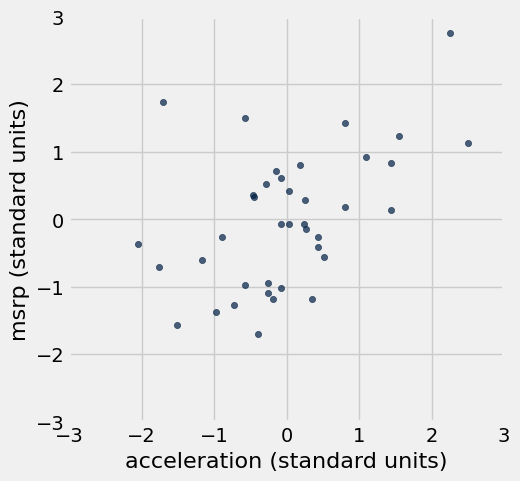

In [45]:
Table().with_columns(
    'acceleration (standard units)', standard_units(
        suv.column('acceleration')),
    'msrp (standard units)', standard_units(suv.column('msrp'))
).scatter(0, 1)
plots.xlim(-3, 3)
plots.ylim(-3, 3);

- The associations that we see in these figures are the same as those we saw before with raw scores.
- Also, because the two scatter diagrams are now drawn on exactly the same scale, we can see that the linear relation in the second diagram is a little more fuzzy than in the first. (raw plot msrp is condensed)

## 15.1.1. The correlation coefficient: Observing the r size

- **correlation coefficient** (**correlation**, ***r***) measures the strength of the linear relationship between two variables.
- The correlation coefficient ***r*** is a number between -1 and 1.
- ***r*** measures the extent to which the scatter plot clusters around a straight line.
- ***r*** = 1 if the scatter diagram is a perfect straight line sloping upwards, and 
- ***r*** = -1 if the scatter diagram is a perfect straight line sloping downwards.


r_scatter

In [46]:
def r_scatter(r):
    plots.figure(figsize=(5,5))
    "Generate a scatter plot with a correlation approximately r"
    x = np.random.normal(0, 1, 1000)   ### normal: normal distribution
    z = np.random.normal(0, 1, 1000)
    y = r*x + (np.sqrt(1-r**2))*z
    plots.scatter(x, y)
    plots.xlim(-4, 4)
    plots.ylim(-4, 4)

<Figure size 500x500 with 0 Axes>

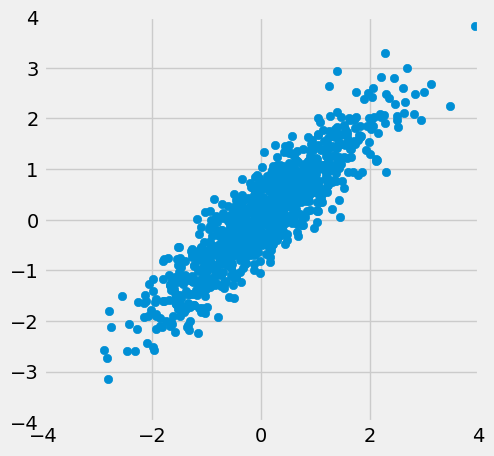

In [51]:
plots.figure(figsize=(5, 5))
r_scatter(0.9)

In [112]:
np.random.normal(0, 5, 10)

array([  9.30590502,  -4.52378307,   9.27265775,  -4.0023114 ,
         0.46987031,   6.27356155,  -1.87341034, -11.58899922,
        -3.25269902,   5.78202449])

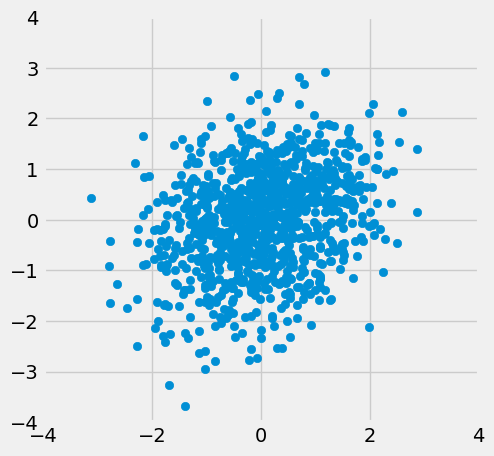

In [113]:
r_scatter(0.25)

In [17]:
r_scatter(0)

In [18]:
r_scatter(-0.55)

## 15.1.2. Calculating *r*


In [53]:
x = np.arange(1, 7, 1)
y = make_array(2, 3, 1, 5, 2, 7)
t = Table().with_columns(
        'x', x,
        'y', y
    )
t

x,y
1,2
2,3
3,1
4,5
5,2
6,7


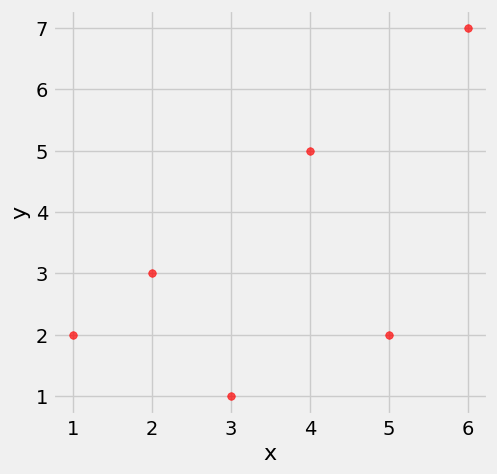

In [119]:
t.scatter(0, 1, s=30, color='red')

In [55]:
##### Step 1. Convert each variable to standard units.
t_su = t.with_columns(
        'x (standard units)', standard_units(x),
        'y (standard units)', standard_units(y))
t_su

x,y,x (standard units),y (standard units)
1,2,-1.46385,-0.648886
2,3,-0.87831,-0.162221
3,1,-0.29277,-1.13555
4,5,0.29277,0.811107
5,2,0.87831,-0.648886
6,7,1.46385,1.78444


In [56]:
##### Step 2. Multiply each pair of standard units.
t_product = t_su.with_column('product of standard units', 
                             t_su.column(2) * t_su.column(3))
t_product

x,y,x (standard units),y (standard units),product of standard units
1,2,-1.46385,-0.648886,0.949871
2,3,-0.87831,-0.162221,0.142481
3,1,-0.29277,-1.13555,0.332455
4,5,0.29277,0.811107,0.237468
5,2,0.87831,-0.648886,-0.569923
6,7,1.46385,1.78444,2.61215


In [57]:
##### Step 3. r is the average of the products computed in Step 2.
r = np.mean(t_product.column(4))
r

0.61741639718977093

## 15.1.3. Properties of *r*


- *r* is a pure number. It has no units. This is because *r* is based on standard units.
- *r* is unaffected by changing the units on either axis. This too is because *r* is based on standard units.
- *r* is unaffected by switching the axes. Algebraically, this is because the product of standard units does not depend on which variable is called *x* and which *y*. Geometrically, switching axes reflects the scatter plot about the line *y* = *x*, but does not change the amount of clustering nor the sign of the association.

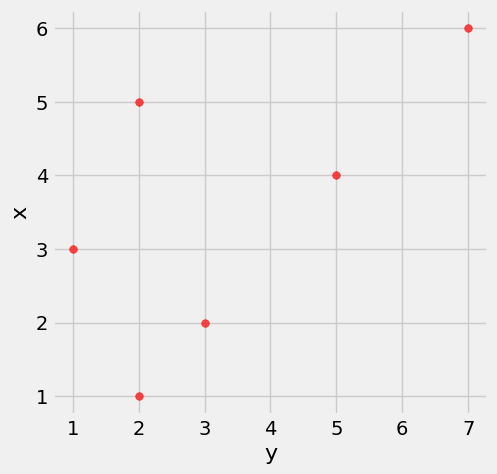

In [60]:
t.scatter('y', 'x', s=30, color='red')

## 15.1.4. The correlation function

Outliers can have a big effect on correlation. Here is an example where a scatter plot for which *r* is equal to 1 is turned into a plot for which *r* is equal to 0, by the addition of just one outlying point.

In [63]:
# function for correlation

def correlation(t, x, y):
    return np.mean(standard_units(t.column(x))*
                   standard_units(t.column(y)))

In [64]:
correlation(t, 'x', 'y')

0.61741639718977093

In [27]:
# order does not matter
correlation(t, 'y', 'x')

0.61741639718977093

In [71]:
# calling correlation on suv:

print(correlation(suv, 'acceleration', 'msrp'))
print(correlation(suv, 'mpg', 'msrp'))

0.4869979928
-0.666714363571


These values confirm what we had observed:

- There is a negative association between price and efficiency, whereas the association between price and acceleration is positive.

- The linear relation between price and acceleration is a little weaker (correlation about 0.5) than between price and mileage (correlation about -0.67).

Correlation is a simple and powerful concept, but it is sometimes misused. Before using *r*, it is important to be aware of what correlation does and does not measure.



## 15.1.5. Association is not Causation

- Correlation only measures association.
- Correlation does not imply causation.
- Though the correlation between the weight and the math ability of children in a school district may be positive, that does not mean that doing math makes children heavier or that putting on weight improves the children’s math skills.
- Age is a confounding variable: older children are both heavier and better at math than younger children, on average.

## 15.1.6. Correlation Measures Linear Association

- Correlation measures only one kind of association – **linear**.
- Variables that have strong non-linear association might have very low correlation.
- Here is an example of variables that have a perfect quadratic relation *y* = *x^2*but have correlation equal to 0.

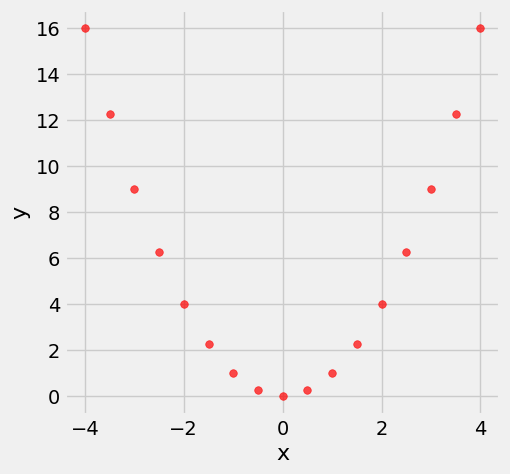

In [75]:
new_x = np.arange(-4, 4.1, 0.5)
nonlinear = Table().with_columns(
        'x', new_x, 'y', new_x**2)
nonlinear.scatter('x', 'y', s=30, color='r')

In [76]:
# correlation between x and y
correlation(nonlinear, 'x', 'y')

0.0

## 15.1.7. Correlation is Affected by Outliers

- **Outliers** can have a big effect on correlation.
- Here is an example where a scatter plot for which ***r*** is equal to 1 is turned into a plot for which 
*r* is equal to 0, by the addition of just one outlying point.

correlation is: 1.0


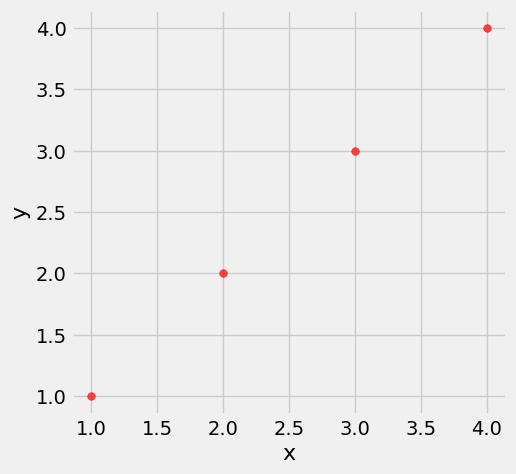

In [85]:
line = Table().with_columns(
        'x', make_array(1, 2, 3, 4),
        'y', make_array(1, 2, 3, 4))
line.scatter('x', 'y', s=30, color='r')
print(f"correlation is: {correlation(line, 'x', 'y')}")

In [86]:
line

x,y
1,1
2,2
3,3
4,4


In [87]:
correlation(line, 'x', 'y')

1.0

correlation is: 0.0


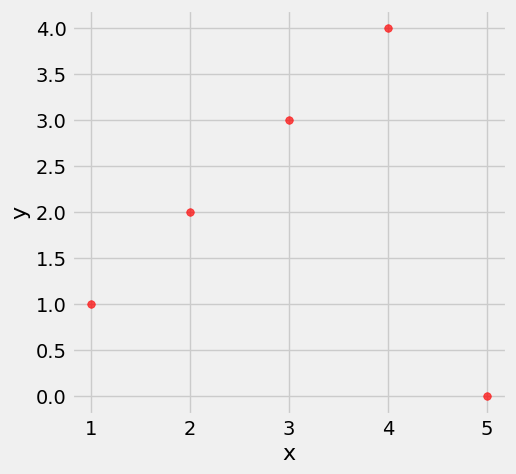

In [92]:
outlier = Table().with_columns(
        'x', make_array(1, 2, 3, 4, 5),
        'y', make_array(1, 2, 3, 4, 0)
    )
outlier.scatter('x', 'y', s=30, color='r')
print(f"correlation is: {correlation(outlier, 'x', 'y')}")

In [36]:
outlier = Table().with_columns(
        'x', make_array(1, 2, 3, 4, 5),
        'y', make_array(1, 2, 3, 4, 0)
    )
outlier.scatter('x', 'y', s=30, color='r')

In [89]:
correlation(outlier, 'x', 'y')

0.0

In [90]:
# from scipy import stats
# import math

correlation(line, 0, 1)

1.0

## 15.1.8. Ecological Correlations Should be Interpreted with Care

Correlations based on aggregated data can be misleading. As an example, here are data on the Critical Reading and Math SAT scores in 2014. There is one point for each of the 50 states and one for Washington, D.C. The column Participation Rate contains the percent of high school seniors who took the test. The next three columns show the average score in the state on each portion of the test, and the final column is the average of the total scores on the test.

In [94]:
sat2014 = Table.read_table(path_data + 'sat2014.csv')
sat2014.show(5)

State,Participation Rate,Critical Reading,Math,Writing,Combined
North Dakota,2.3,612,620,584,1816
Illinois,4.6,599,616,587,1802
Iowa,3.1,605,611,578,1794
South Dakota,2.9,604,609,579,1792
Minnesota,5.9,598,610,578,1786


In [41]:
sat2014.sort('State')

State,Participation Rate,Critical Reading,Math,Writing,Combined
Alabama,6.7,547,538,532,1617
Alaska,54.2,507,503,475,1485
Arizona,36.4,522,525,500,1547
Arkansas,4.2,573,571,554,1698
California,60.3,498,510,496,1504
Colorado,14.3,582,586,567,1735
Connecticut,88.4,507,510,508,1525
Delaware,100,456,459,444,1359
District of Columbia,100,440,438,431,1309
Florida,72.2,491,485,472,1448


Correlation between Reading and Math: 0.9847558411067433


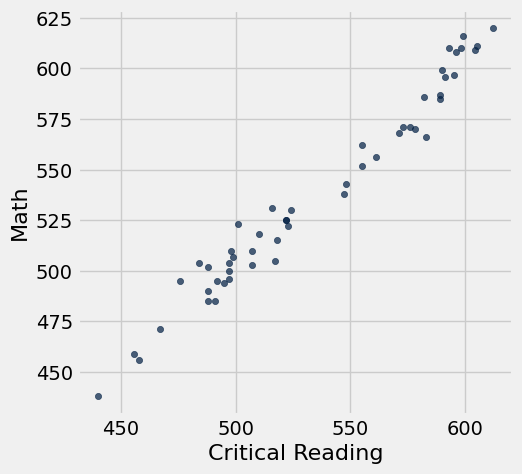

In [100]:
##### scatter critical reading and math
sat2014.scatter('Critical Reading', 'Math')

print(f"Correlation between Reading and Math: {correlation(sat2014, 
                                    'Critical Reading', 'Math')}")

- That’s an extremely high correlation. But it’s important to note that this does not reflect the strength of the relation between the Math and Critical Reading scores of students.

- The data consist of average scores in each state. But states don’t take tests – students do. The data in the table have been created by lumping all the students in each state into a single point at the average values of the two variables in that state. But not all students in the state will be at that point, as students vary in their performance. If you plot a point for each student instead of just one for each state, there will be a cloud of points around each point in the figure above. The overall picture will be more fuzzy. The correlation between the Math and Critical Reading scores of the students will be lower than the value calculated based on state averages.

- Correlations based on aggregates and averages are called **ecological correlations** and are frequently reported. As we have just seen, they must be interpreted with care.

## 15.1.9. Serious or tongue-in-cheek?

### The paper is an "Occasional Note"